In [7]:
%matplotlib inline
import torch
from sebm.models import Encoder, Decoder
from torchvision import datasets, transforms
from sebm.data import load_data
dataset =  'fashionmnist' # 'svhn' # 'cifar10' # 'mnist' #  'flowers102' #
if dataset == 'mnist' or dataset == 'fashionmnist':
    input_channels, im_height, im_width = 1, 28, 28
else:
    input_channels, im_height, im_width = 3, 32, 32
device = torch.device('cuda:1')
arch =  'simplenet2' # 'wresnet' # 'simplenet'
lr = 1e-4
seed = 1
latent_dim = 128
activation = 'ReLU'
reparameterized = True
heldout_class = -1
load_version = 'vae-out=%s-d=%s-seed=%s-lr=%s-zd=%s-act=%s-arch=%s' % (heldout_class, dataset, seed, lr, latent_dim, activation, arch)
data_dir = '/home/hao/Research/sebm_data/'
if arch == 'simplenet2':
    enc = Encoder(arch=arch,
                  reparameterized=reparameterized,
                  im_height=im_height, 
                  im_width=im_width, 
                  input_channels=input_channels, 
                  channels=[64,64,32,32], 
                  kernels=[3,4,4,4], 
                  strides=[1,2,2,2], 
                  paddings=[1,1,1,1], 
                  hidden_dim=[128],
                  latent_dim=latent_dim,
                  activation=activation)
    dec = Decoder(arch=arch,
                  device=device,
                  input_channels=input_channels, 
                  channels=[64,64,32,32], 
                  kernels=[3,4,4,4], 
                  strides=[1,2,2,2], 
                  paddings=[1,1,1,1], 
                  output_paddings=[1,0,0,0], ## TODO: hand-coded for now
                  hidden_dim=[128],
                  latent_dim=latent_dim,
                  output_dim=288, ## TODO: hand-coded for now
                  activation=activation)
else:
    raise NotImplementError
enc.cuda().to(device)  
dec.cuda().to(device)
print('Loading trained models...')
enc.load_state_dict(torch.load('../weights/cp-%s' % load_version)['enc_state_dict'])
dec.load_state_dict(torch.load('../weights/cp-%s' % load_version)['dec_state_dict'])

Loading trained models...


<All keys matched successfully>

In [8]:
from sebm.eval import Evaluator_VAE
evaluator = Evaluator_VAE(enc, dec, device, dataset, data_dir)

Note: downsampling function is Resize(size=1, interpolation=PIL.Image.BILINEAR)


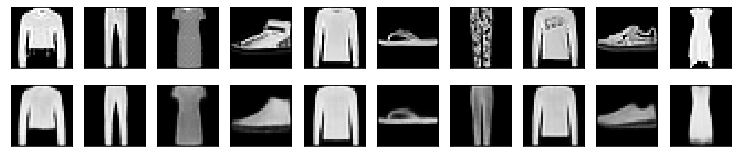

In [9]:
images, recons = evaluator.test_one_batch(batch_size=10)
evaluator.plot_samples(images, recons)

extract mean feature of data using EBM..
Note: downsampling function is Resize(size=1, interpolation=PIL.Image.BILINEAR)


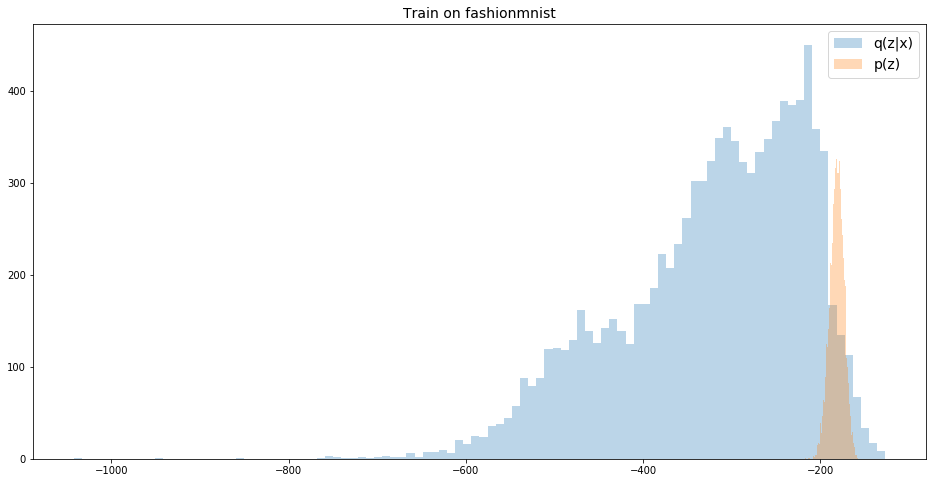

In [10]:
evaluator.plot_post_under_prior(train=False, save_name='vae_%s' % dataset)

In [11]:
evaluator.train_logistic_classifier()

extract mean feature of training data using EBM..
Note: downsampling function is Resize(size=1, interpolation=PIL.Image.BILINEAR)
start to train lr classifier..


/home/hao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


extract mean feature of testing data using EBM..
Note: downsampling function is Resize(size=1, interpolation=PIL.Image.BILINEAR)
testing lr classifier..
mean accuray=0.8030
